# Problem statement: Consider only the below columns and prepare a prediction model for predicting Price.

### - Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

- Model -- model of the car
- Price -- Offer Price in EUROs
- Age_08_04 -- Age in months as in August 2004
- KM -- Accumulated Kilometers on odometer
- HP -- Horse Power
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms

In [3]:
#Import Liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels as sm
import scipy.stats as stat
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as mn

In [4]:
#Import Dataset
df=pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
pd.set_option('DISPLAY.max_columns', None)
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [5]:
df.shape

(1436, 38)

#### - As per probleme statement we have to condsider only given coloumns to craete a model for predictions

In [6]:
data=df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Descriptive Analysis

In [7]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


#### ^Observation: There are no missing values in the Data set by reading Counts from Above

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### ^Observation: all the data types are correct .

In [9]:
#Renaming the columns
data.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'QT'}, inplace=True)
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Checking for missing values

In [10]:
(data.values==0).sum()

0

### Visualizing Missing Values

<AxesSubplot:>

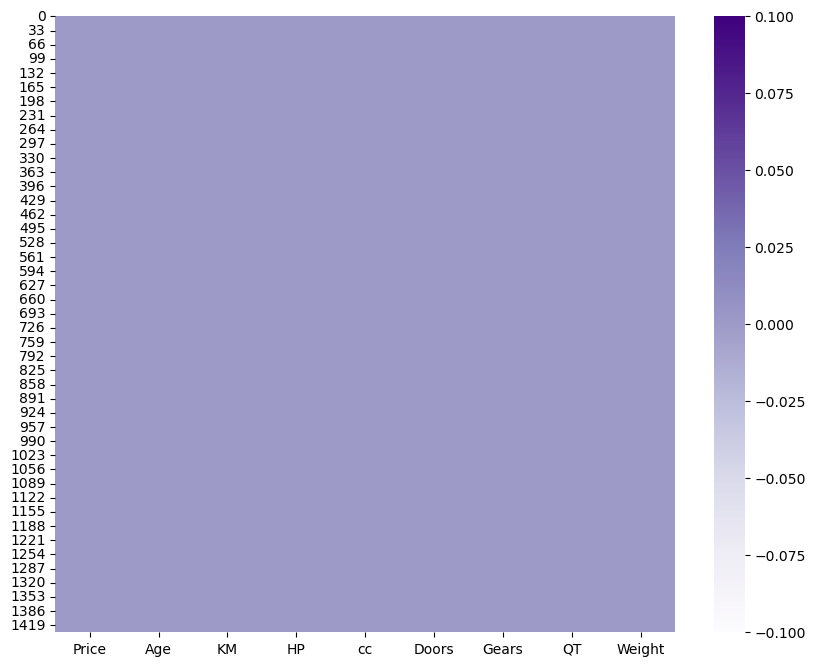

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cmap='Purples')

<AxesSubplot:>

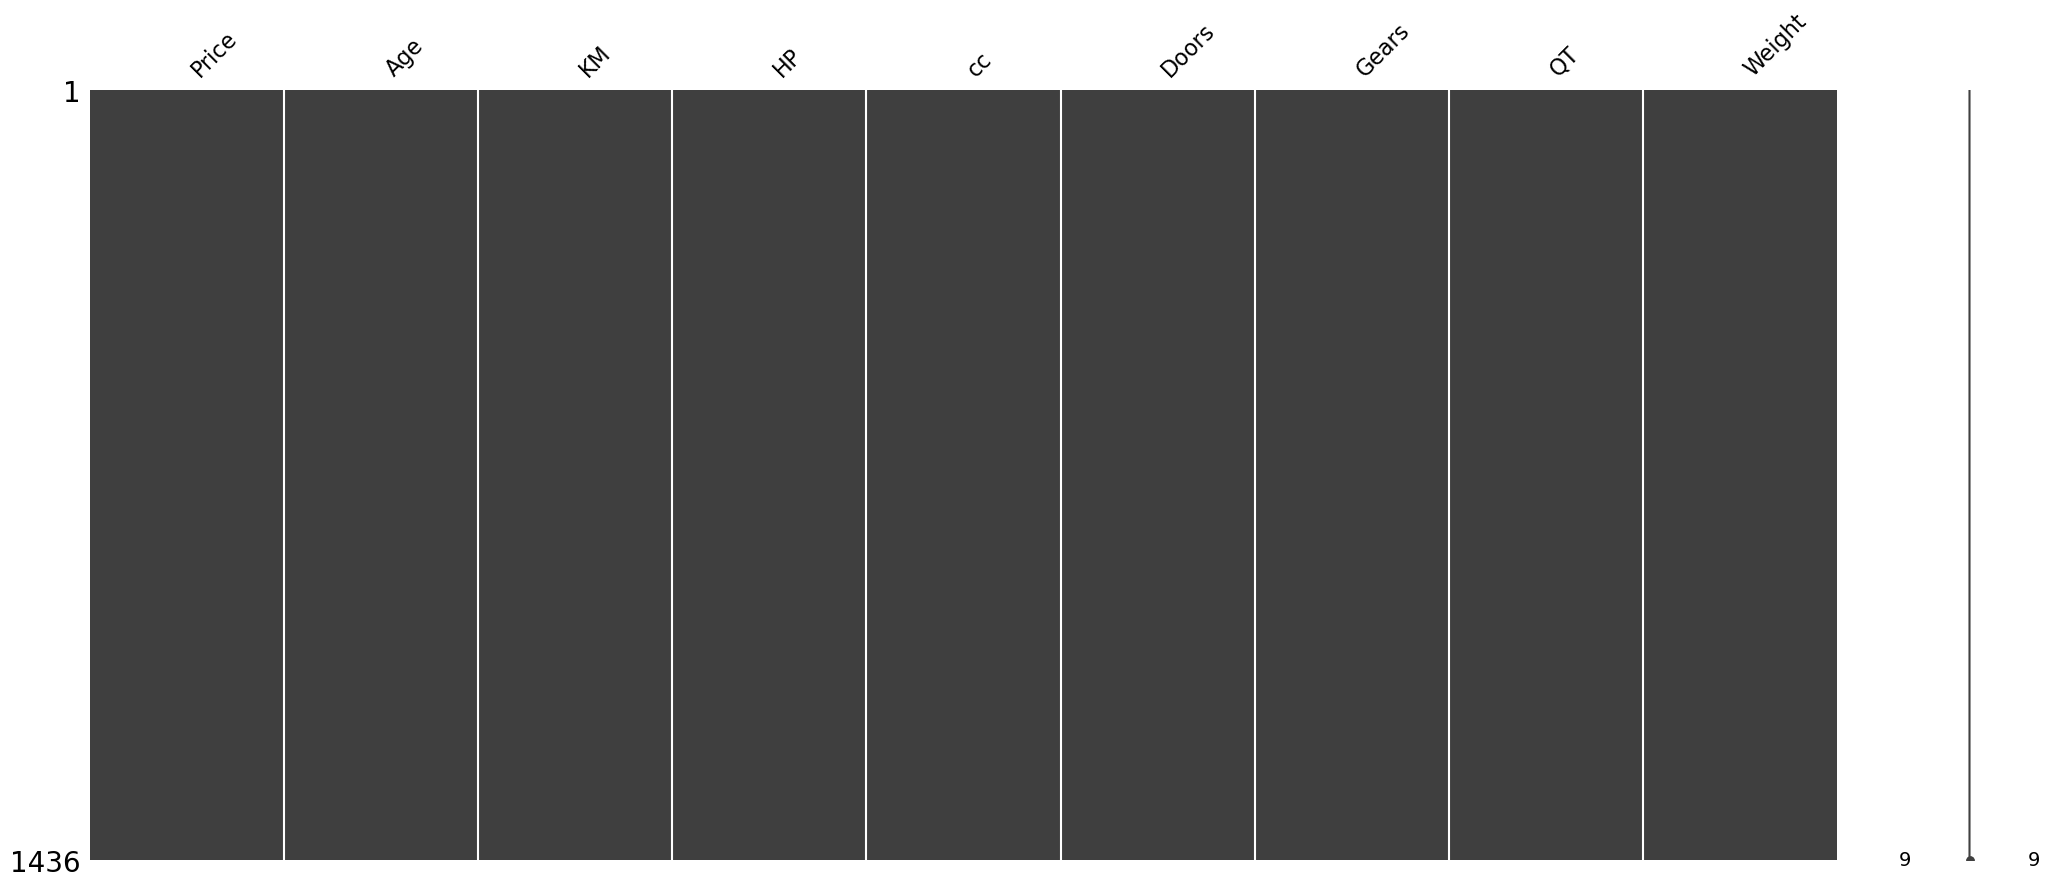

In [12]:
mn.matrix(data)

^Observation: After checking above there is no null value present in the dataset

### Checking for Duplicated Values

In [13]:
data.duplicated().sum()

1

In [14]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
data[data['Price']==24950]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [16]:
data=data.drop_duplicates().reset_index(drop=True)

In [17]:
data.duplicated().sum()

0

### ^Observation: There are duplicated values in the dataset
- Hence, we dropped those values

In [18]:
data['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [19]:
data['cc'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [20]:
data['Doors'].unique()

array([3, 5, 4, 2], dtype=int64)

In [21]:
data['Gears'].unique()

array([5, 6, 3, 4], dtype=int64)

In [22]:
data['QT'].unique()

array([210, 100, 185,  85,  19, 234,  69, 283,  64, 197, 163,  72,  40],
      dtype=int64)

In [23]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature], dist='norm',plot=pylab)

In [24]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

Text(0.5, 1.0, 'Weight')

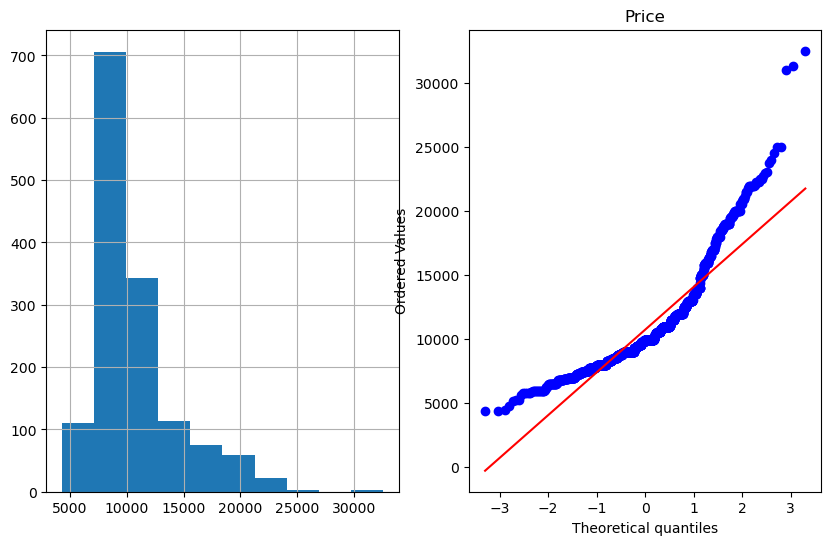

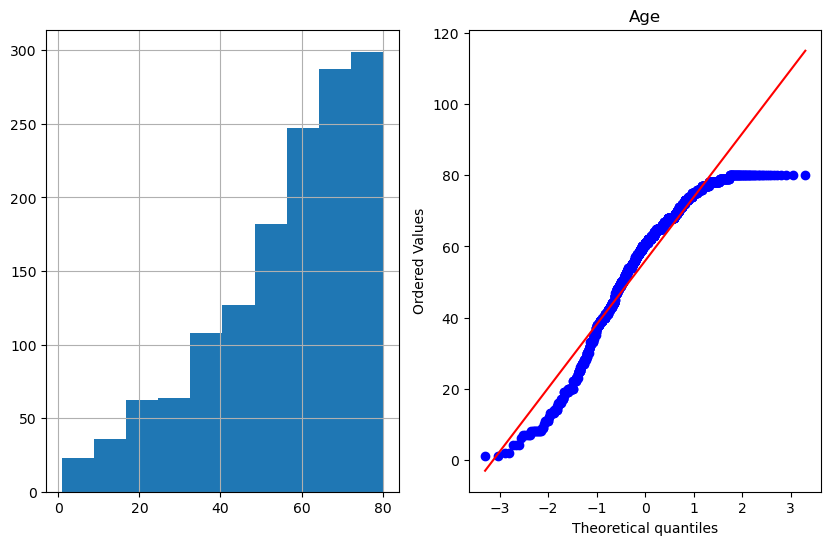

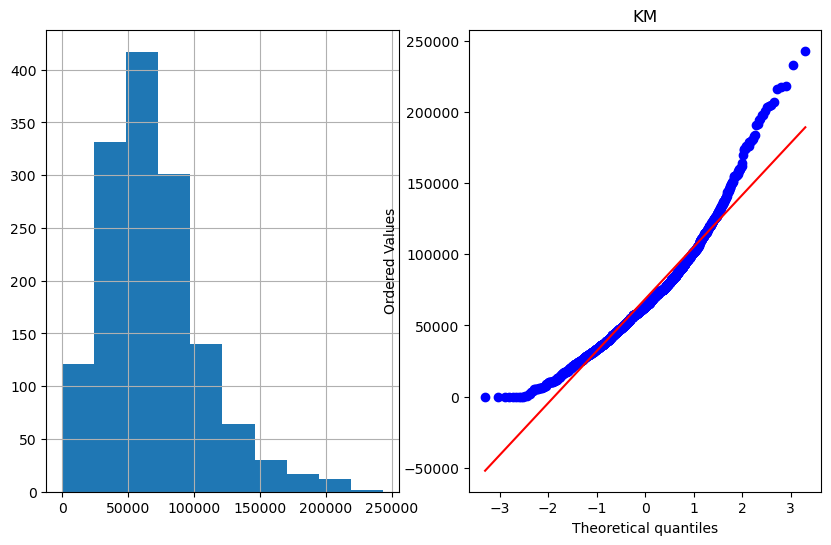

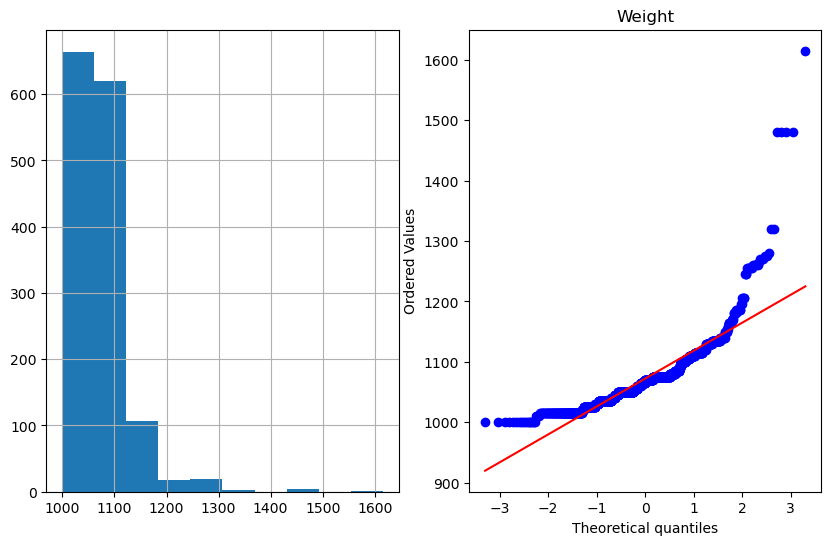

In [25]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.

### Lets perform Shapiro Wilk test to check the features are normally distributed or not

In [26]:
from scipy.stats import shapiro

In [27]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [28]:
print('Price Feature:',shapiro(data.Price),'\n',
    'Age Feature', shapiro(data.Age),'\n',
     'KM Feature', shapiro(data.KM),'\n',
     'Weight feature',shapiro(data.Weight))

Price Feature: ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
 Age Feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
 KM Feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22) 
 Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40)


- Null Hypothesis is features are normally distributed
- Alternate Hypothesis is features are not normally distributed.

### - As pvalue of above continuous features are less than 0.05 so reject the null hypothesis. so we got the evidence that features are not normally distributed.

# Visulasing the relation of independent features with respect to dependent feature

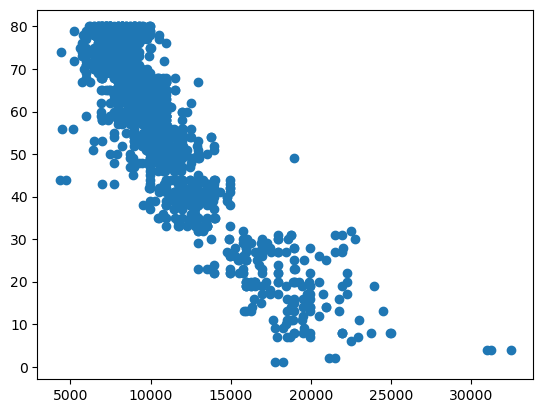

In [29]:
plt.scatter(data['Price'], data['Age'])

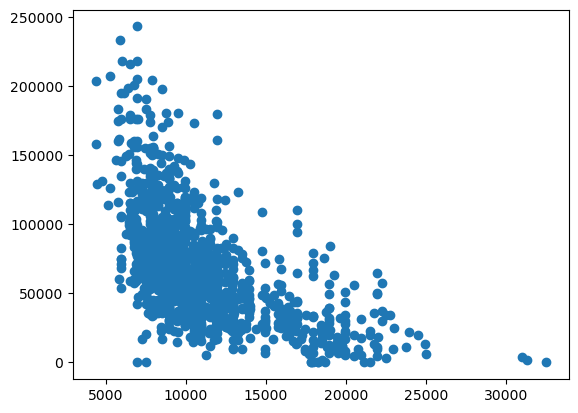

In [30]:
plt.scatter(data['Price'], data['KM'])

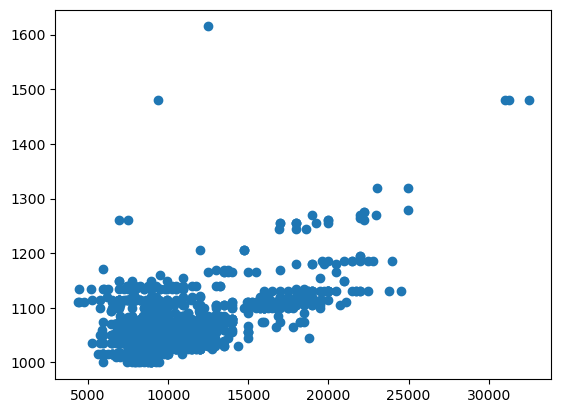

In [31]:
plt.scatter(data['Price'], data['Weight'])

# Lets analyze the relationship between the discrete variables and Price

In [32]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

<AxesSubplot:xlabel='HP', ylabel='Price'>

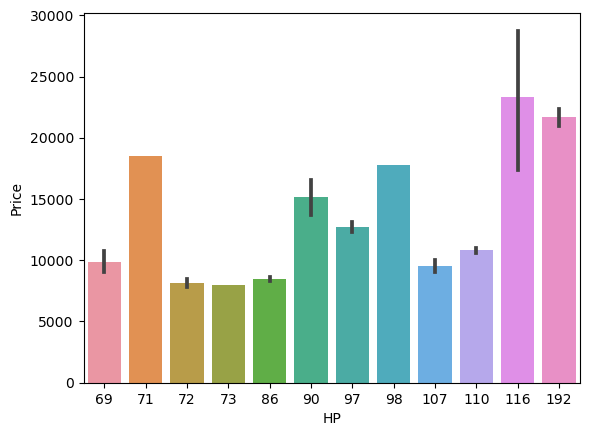

In [33]:
sns.barplot(data['HP'],data['Price'])

<AxesSubplot:xlabel='cc', ylabel='Price'>

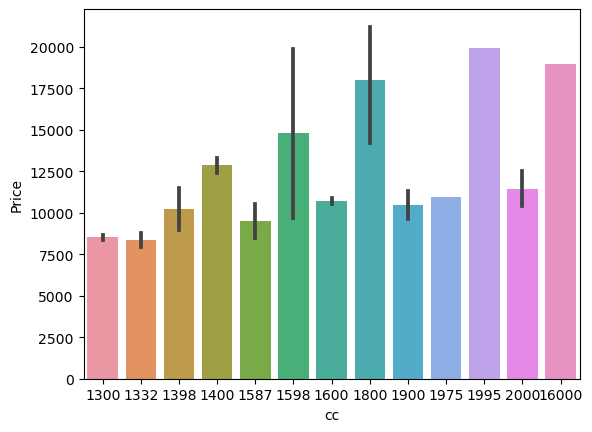

In [34]:
sns.barplot(data['cc'],data['Price'])

<AxesSubplot:xlabel='Doors', ylabel='Price'>

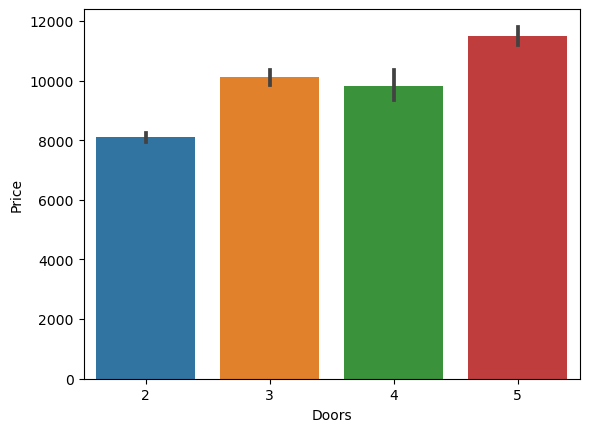

In [35]:
sns.barplot(data['Doors'],data['Price'])

<AxesSubplot:xlabel='Gears', ylabel='Price'>

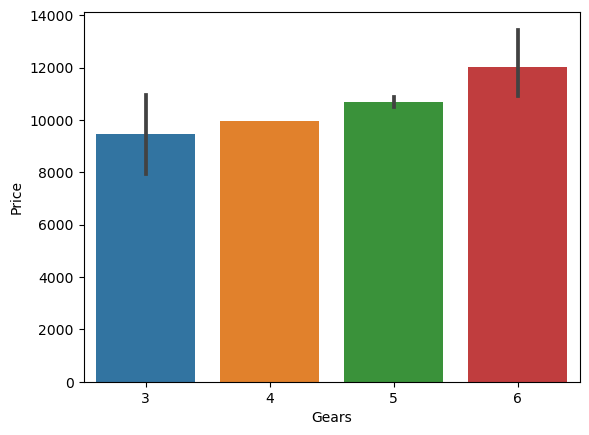

In [36]:
sns.barplot(data['Gears'],data['Price'])

<AxesSubplot:xlabel='QT', ylabel='Price'>

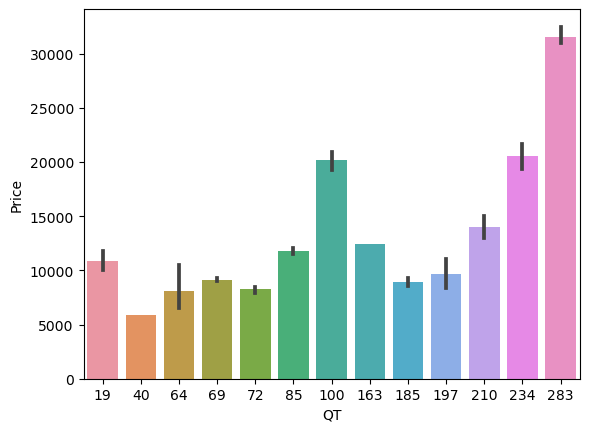

In [37]:
sns.barplot(data['QT'],data['Price'])

###### Obervations:- There is no relation with price

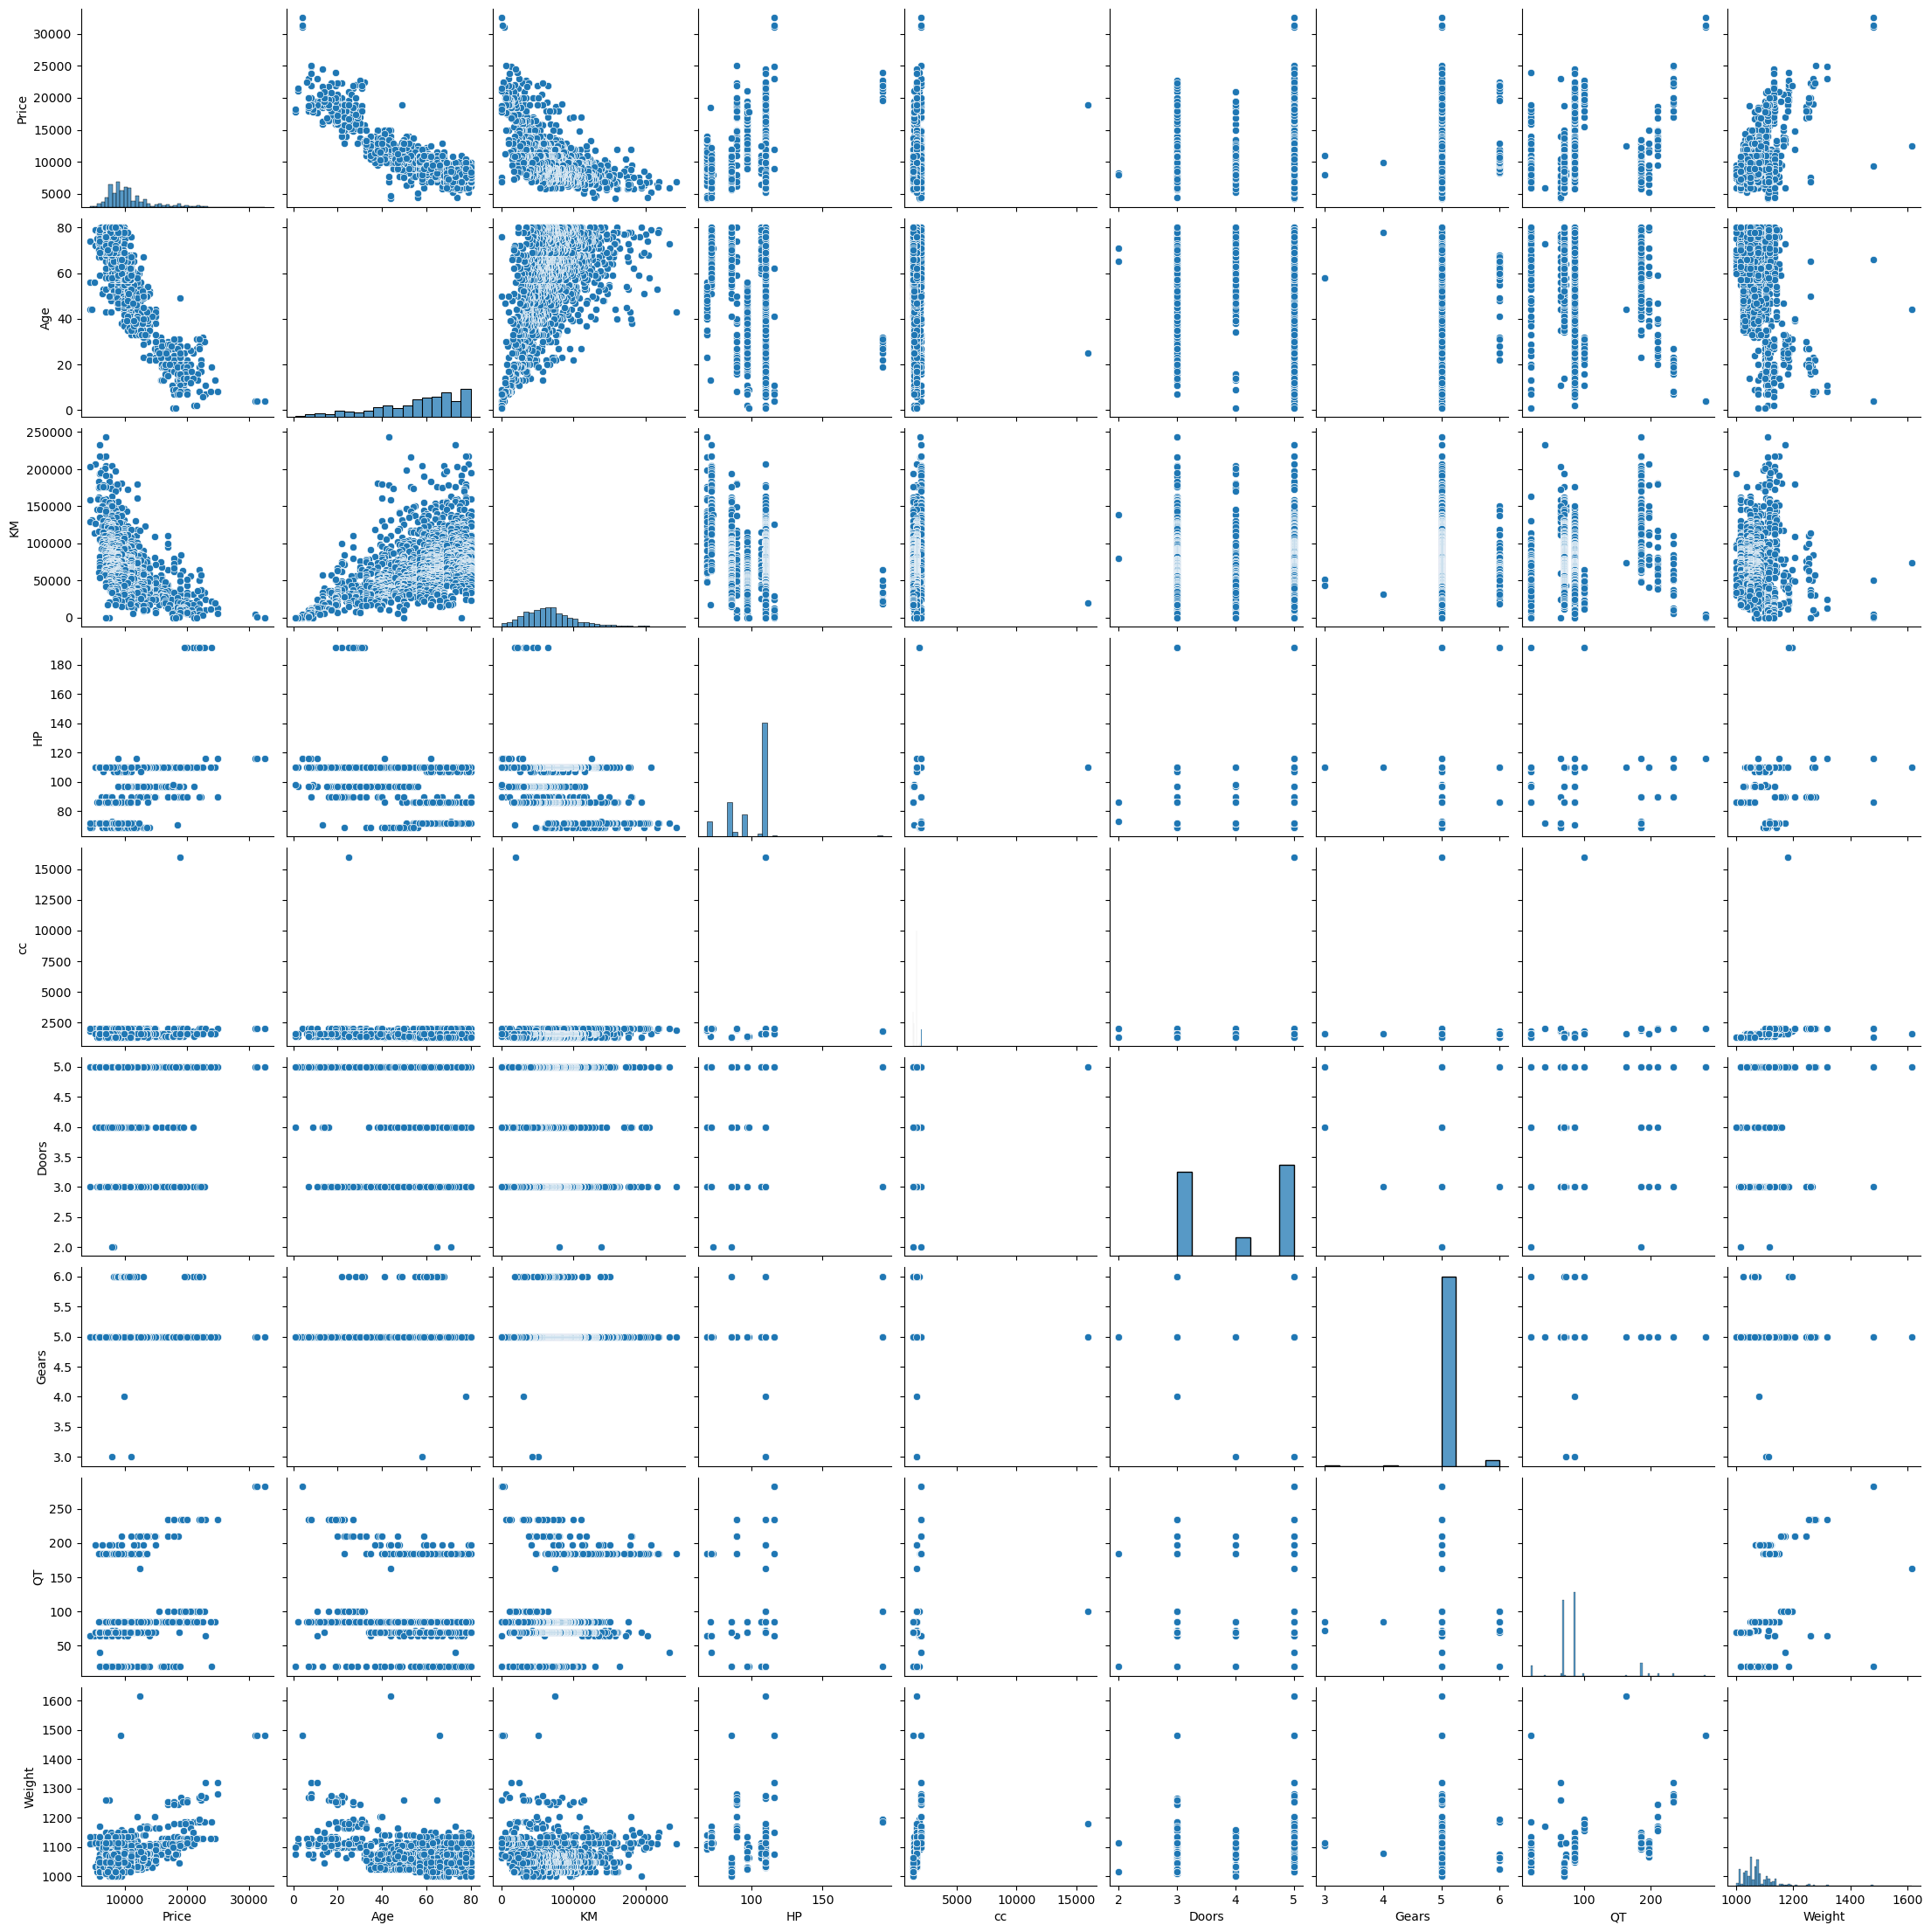

In [38]:
sns.pairplot(data)

In [39]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

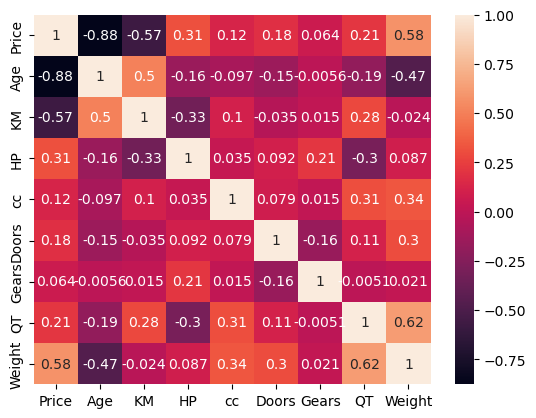

In [40]:
sns.heatmap(data.corr(),annot=True)

# ^Observation:
- There is not much of difference between discreat feature has to have a sginificant amount of changes in Prices from each other and there is not any direct relation
- Threr is not relation within the independent variable.
- Age has strong relation with Price

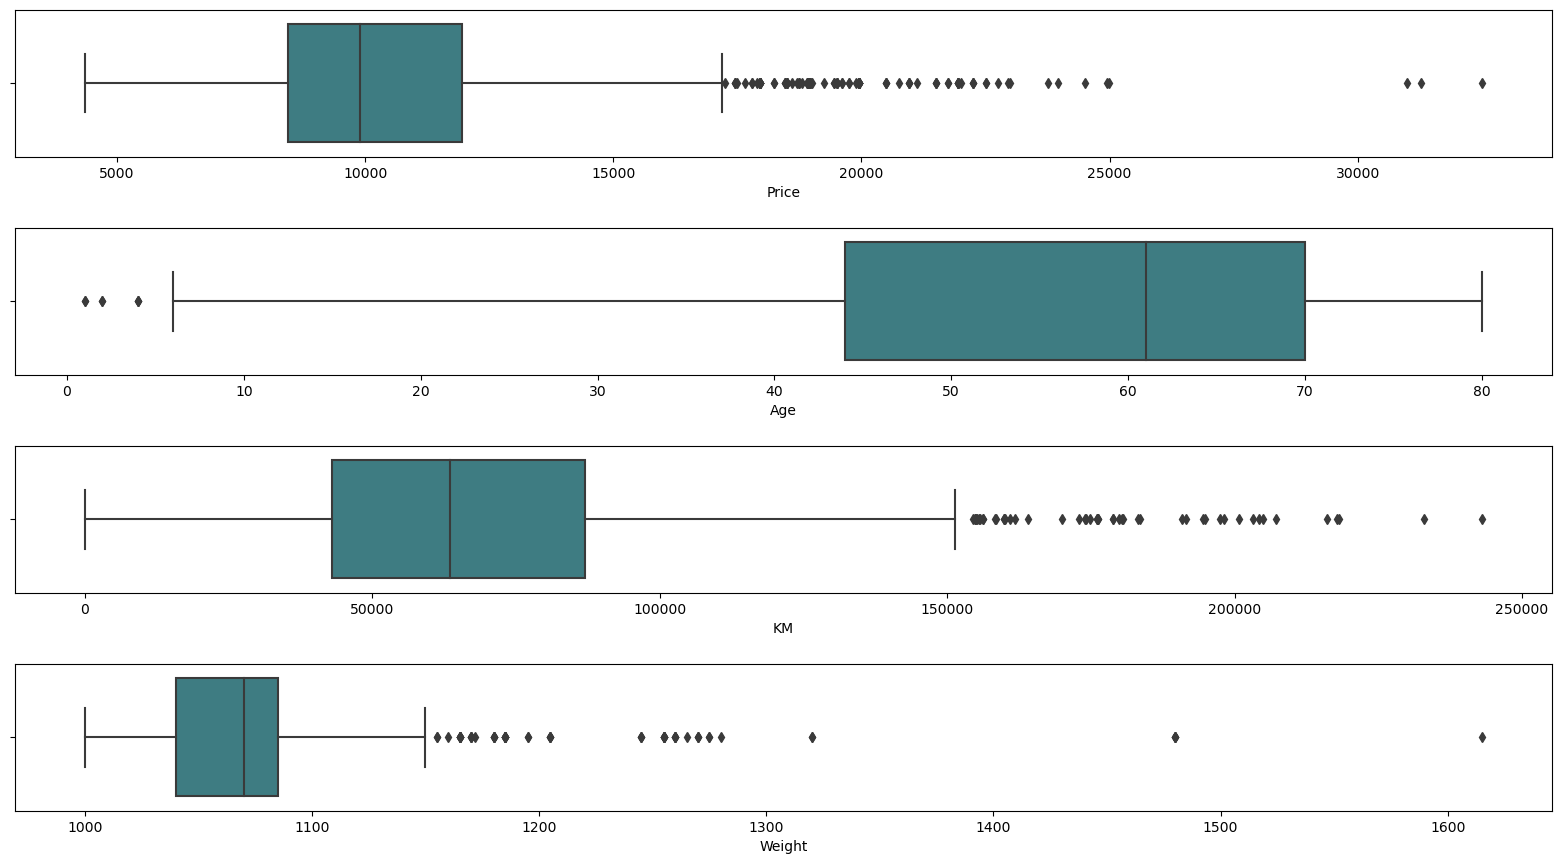

In [41]:
df=data.copy()
fig, axes=plt.subplots(4,1,figsize=(16,9))
sns.boxplot(x=df['Price'], data=df, palette='crest', ax=axes[0])
sns.boxplot(x=df['Age'], data=df,palette='crest', ax=axes[1])
sns.boxplot(x=df['KM'], data=df,palette='crest', ax=axes[2])
sns.boxplot(x=df['Weight'], data=df,palette='crest', ax=axes[3])
plt.tight_layout(pad=2.0)

# Treating the outliers by Median value

In [42]:
from matplotlib.cbook import boxplot_stats

In [43]:
boxplot_stats(df['Price'])

[{'mean': 10720.915679442509,
  'iqr': 3500.0,
  'cilo': 9754.941979648513,
  'cihi': 10045.058020351487,
  'whishi': 17200,
  'whislo': 4350,
  'fliers': array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
         17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
         21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
         18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
         19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
         18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
         21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
         18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
         19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750,
         19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950,
         20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950,
         19950, 21950, 22500, 18500, 18700, 21125, 2150

In [44]:
df[df['Price']>17200]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
...,...,...,...,...,...,...,...,...,...
181,21125,2,225,97,1400,5,5,85,1110
182,21500,2,15,110,1600,5,5,85,1130
183,17795,1,1,98,1400,4,5,19,1100
184,18245,1,1,110,1600,5,5,19,1075


<AxesSubplot:xlabel='Price'>

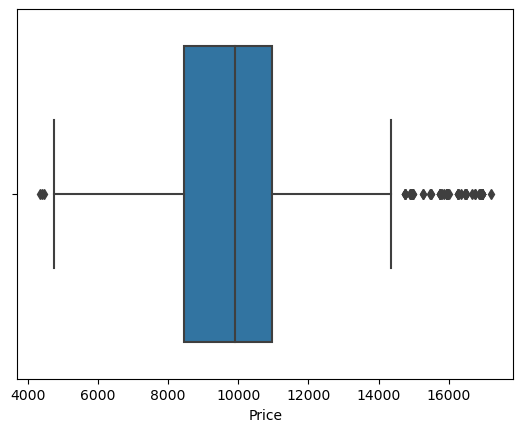

In [45]:
for i in df['Price']:
    if i > 17200:
        df['Price']=df['Price'].replace(i, df['Price'].median())
sns.boxplot(df['Price'])

### Observation^ : for Price Feature after putting the median value we do not get rid on outliers, till some amount of outliers are presents.
- lets try mean value for imputation

In [46]:
boxplot_stats(df['Price'])

[{'mean': 9941.46968641115,
  'iqr': 2500.0,
  'cilo': 9796.387128320366,
  'cihi': 10003.612871679634,
  'whishi': 14350,
  'whislo': 4750,
  'fliers': array([ 4350,  4450,  4400, 14950, 16900, 16750, 16950, 15950, 16950,
         15950, 16950, 16250, 15950, 15750, 16950, 15750, 15950, 14950,
         15500, 15750, 15950, 14950, 15750, 14750, 16750, 16950, 16950,
         15800, 15750, 15500, 15250, 15250, 15999, 14950, 16500, 16950,
         14950, 15950, 15950, 15750, 16950, 16895, 14900, 15450, 16650,
         14900, 15950, 16450, 15950, 15950, 15950, 16250, 16950, 16350,
         16950, 15950, 16500, 15850, 16250, 15950, 16250, 15950, 16500,
         16500, 16250, 16450, 16450, 17200, 16868, 14750, 14750, 14950,
         14950, 14750, 14990, 14950, 14950, 14950, 14990], dtype=int64),
  'q1': 8450.0,
  'med': 9900.0,
  'q3': 10950.0}]

<AxesSubplot:xlabel='Price'>

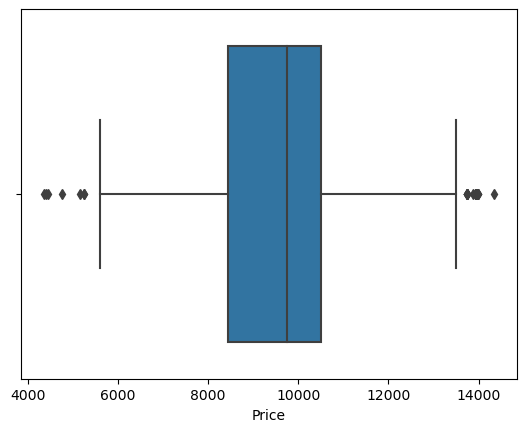

In [47]:
for i in df['Price']:
    if i > 14350:
        df['Price']=df['Price'].replace(i, df['Price'].mean())
sns.boxplot(df['Price'])

In [48]:
boxplot_stats(df['Price'])

[{'mean': 9616.25147559275,
  'iqr': 2050.0,
  'cilo': 9665.0374452227,
  'cihi': 9834.9625547773,
  'whishi': 13500.0,
  'whislo': 5600.0,
  'fliers': array([ 4350.,  4750.,  4450.,  5150.,  5250.,  4400.,  5250., 13750.,
         13950., 13750., 13950., 13950., 13950., 13950., 13950., 13875.,
         13950., 13995., 13750., 13950., 13950., 13995., 13950., 13950.,
         13950., 13750., 13750., 14350., 13995., 13950., 13950., 13750.,
         13750.]),
  'q1': 8450.0,
  'med': 9750.0,
  'q3': 10500.0}]

### Observation^ : for Price Feature after putting the mean value we get rid on outliers to some extent

In [49]:
boxplot_stats(df['Age'])

[{'mean': 55.98048780487805,
  'iqr': 26.0,
  'cilo': 59.922426134531804,
  'cihi': 62.077573865468196,
  'whishi': 80,
  'whislo': 6,
  'fliers': array([4, 4, 4, 2, 2, 1, 1], dtype=int64),
  'q1': 44.0,
  'med': 61.0,
  'q3': 70.0}]

<AxesSubplot:xlabel='Age'>

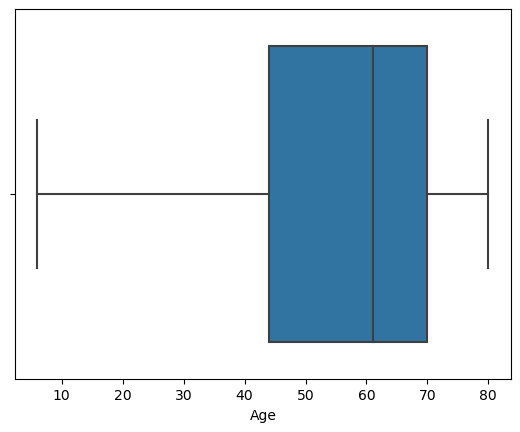

In [50]:
for i in df['Age']:
    if i < 6:
        df['Age']=df['Age'].replace(i, df['Age'].median())
sns.boxplot(df['Age'])

### Observation^ : for Age Feature after putting the median value we get rid on outliers,Now no outliers are presents.

In [51]:
boxplot_stats(df['KM'])

[{'mean': 68571.78257839721,
  'iqr': 44041.5,
  'cilo': 61625.693484768555,
  'cihi': 65276.306515231445,
  'whishi': 151300,
  'whislo': 1,
  'fliers': array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
         176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
         176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
         217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
         180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
         160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
         154900], dtype=int64),
  'q1': 43000.0,
  'med': 63451.0,
  'q3': 87041.5}]

<AxesSubplot:xlabel='KM'>

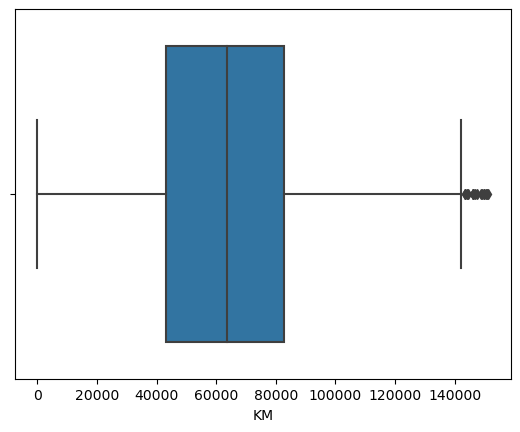

In [52]:
for i in df['KM']:
    if i > 151300:
        df['KM']=df['KM'].replace(i, df['KM'].median())
sns.boxplot(df['KM'])

In [53]:
boxplot_stats(df['KM'])

[{'mean': 64583.20696864111,
  'iqr': 39774.0,
  'cilo': 61802.56065672569,
  'cihi': 65099.43934327431,
  'whishi': 142130,
  'whislo': 1,
  'fliers': array([150000, 149329, 146736, 143513, 150585, 149000, 147636, 144521,
         144000, 151300, 151000, 150000, 146304, 146197, 145996, 143560],
        dtype=int64),
  'q1': 43000.0,
  'med': 63451.0,
  'q3': 82774.0}]

### Observation^ : for KM Feature after putting the median value we do not  get rid on outliers, still ouliers are presents.

In [54]:
boxplot_stats(df['Weight'])

[{'mean': 1072.2871080139373,
  'iqr': 45.0,
  'cilo': 1068.1349683097667,
  'cihi': 1071.8650316902333,
  'whishi': 1150,
  'whislo': 1000,
  'fliers': array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
         1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
         1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
         1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1270, 1280, 1270,
         1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205, 1205,
         1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172],
        dtype=int64),
  'q1': 1040.0,
  'med': 1070.0,
  'q3': 1085.0}]

<AxesSubplot:xlabel='Weight'>

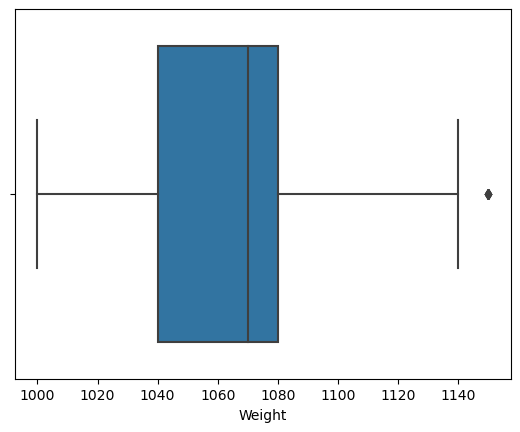

In [55]:
for i in df['Weight']:
    if i > 1150:
        df['Weight']=df['Weight'].replace(i, df['Weight'].median())
sns.boxplot(df['Weight'])

### Observation^ : for Weight Feature after putting the median value we get rid on outliers, Only one outliers is present.